# 회귀분석

> 회귀분석을 사용하는 이유
- 변수 사이의 인과관계가 명확해지고, 한 변수가 다른 변수에 끼치는 영향을 추정할 수 있다




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

import numpy as np
np.warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# A 학생이 취득한 데이터 호출 (퀴즈 점수, 기말고사 점수, 전날 수면시간, 통학 방법)
df = pd.read_csv(
    '/content/drive/MyDrive/개인최윤아/Today_I_learn/5월/[교제]part9.-확률-및-통계-파이썬-코드파일-ipynb.-22.02.24-/[패스트캠퍼스-확률및통계] 12_scores_reg.csv'
)
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


## 단순회귀모형

In [ ]:
x = np.array(df['quiz']) # 설명변수 : 쪽지 시험의 평균 점수
y = np.array(df['final_test']) #반응변수 : 기말고사 점수
p = 1 # 설명변수의 수

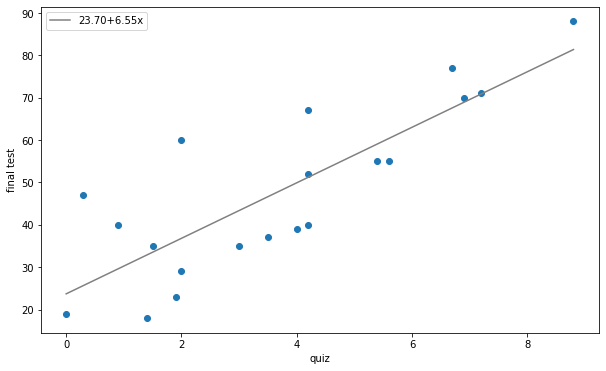

In [ ]:
# 단순회귀모형의 예시 시각화 (산점도 & 회귀직선)
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', 
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x') # poly_fit : 회귀직선 학습
ax.scatter(x, y)
ax.legend()

plt.show()

### 회귀분석에서의 가설


> y = β0 + β1x <br>
> 예측할 수 없는 부분 = 오차항(Error Term)<br>
> 설명변수가 확률변수는 아니다<br>
> 오차항은 서로 독립이고 정규분포를 따른다



### statsmodels에 의한 회귀분석

In [ ]:
formula = 'final_test ~ quiz' # 반응변수 및 설명변수의 관계를 나타내는 문자열 : '<반응변수> ~ <설명변수>'
result = smf.ols(formula, df).fit() # OLS(Ordinary Least Squares) : 최소제곱법
#  summary 메서드 사용하여 표로 나타낼 수 있음
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 20 May 2022   Prob (F-statistic):           8.59e-06
Time:                        03:57:59   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.0

### 회귀계수

In [ ]:
# 첫번째 열은 β0 예측치 계산을 위해 전부 1, 두번쨰 열은 β1 예측치 계산을 위해 X 행렬 생성
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [ ]:
# 최소제곱법으로  β0 예측값, β1예측값 구하기
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat

(23.699, 6.554)

In [ ]:
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

In [ ]:
# 잔차의 자유도는 회귀계수의 수 p + 1 만큼 감소, 모분산의 불편추정량은 n - ( p + 1 )로 나눠서 계산하게 됨
s_var = np.var(eps_hat, ddof=p+1) # 자유도 감소
s_var

134.290

In [ ]:
# 표준오차 계산
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [ ]:
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.714, 1.069)

In [ ]:
# 신뢰구간 계산
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.796, 33.603)

In [ ]:
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, hcl

(4.309, 8.799)

In [ ]:
# t 검정 (회귀계수 β1)
t = beta1_hat / np.sqrt(s_var * C1)
t

6.133

In [ ]:
# 귀무가설 β0 = 0
# 대립가설 β0 != 0
(1 - rv.cdf(t)) * 2
# 귀무가설이 기각되어, 쪽지 시험 평균 점수와 기말고사 점수 사이에는 인과관계가 있다고 말할 수 있다.

0.000

In [ ]:
# t 검정 (회귀계수 β0)
t = beta0_hat / np.sqrt(s_var * C0)
t

5.028

In [ ]:
(1 - rv.cdf(t)) * 2

0.000

## 다중회귀모형 (Multiple Regression Model)
- 설명변수가 2개 이상인 회귀분석 모형

In [ ]:
# statsmodel로 다중회귀모형 회귀분석 수행하기
formula = 'final_test ~ quiz + sleep_time' # 반응변수 ~ 설명변수 + 설명변수 (다중인 경우!)
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Fri, 20 May 2022   Prob (F-statistic):           6.19e-06
Time:                        03:58:16   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.8

### 회귀계수

In [ ]:
# numpy로 다중회귀모형의 회귀계수 구하기
x1 = df['quiz'] # 설명변수
x2 = df['sleep_time'] # 설명변수
y = df['final_test'] # 반응변수
p = 2 # 설명변수 개수

In [ ]:
# np.linglg.lstsq 함수에 의해 최소제곱법 실행 -> 추정값 계산
X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]
beta0_hat, beta1_hat, beta2_hat

(-1.871, 6.429, 4.192)

In [ ]:
# 잔차 구하기
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

In [ ]:
# 표준오차 구하기
s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [ ]:
# β2의 95% 신뢰구간 구하기
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
lcl, hcl

(0.440, 7.943)

### 가변수
- 질적변수를 회귀분석에 활용하고 싶다면?
- 질적변수를 양적변수로 변환하는 기법 필요! -> 가변수 (Dummy Variable)
- 가변수는 0,1을 취하는 2진 변수, 변환하고 싶은 질적변수의 카테고리 수에서 하나를 줄인수만큼 변환된 새로운 변수의 개수가 만들어진다.
- statsmodels에서는 질적변수를 가변수로 쉽게 변경하여 작업을 진행한다.

In [ ]:
# snl.ols formula에 school_method 변수명을 추가해주면 알아서 새로 생성된 가변수를 기반으로 회귀분석이 진행된다.
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Fri, 20 May 2022   Prob (F-statistic):           7.47e-05
Time:                        03:58:25   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.33

## 모형의 선택
- 좋은 모형 생성 및 고르는 방법
> 1. 적합성 높이기 (과적합, Overfitting 주의!)
> 2. 예측력 높은 모형 선택
> 모형을 고를 때는 적합도보다 예측 정확도가 좋은 것을 골라야 한다

In [ ]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 20 May 2022   Prob (F-statistic):           8.59e-06
Time:                        03:58:28   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.0

In [ ]:
# 잔차제곱합 확인
y_hat = np.array(result.fittedvalues)
y_hat

array([51.225, 70.886, 23.699, 43.361, 33.53 , 29.598, 36.152, 46.638,
       49.914, 59.09 , 51.225, 68.92 , 36.807, 81.372, 25.666, 67.61 ,
       51.225, 60.4  , 32.875, 36.807])

In [ ]:
eps_hat = np.array(result.resid)
eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

In [ ]:
np.sum(eps_hat ** 2)

2417.228

### 결정계수 (R^2 : R - squared)
- 0과 1 사이의 값을 취한다
- 예측값이 관측값에 가까울수록 회귀변동은 총변동에 가까운 값이 되어 1에 가까울수록 좋은 모형이 된다
- 단순회귀모형에서는 결정계수가 상관계수의 제곱값과 일치한다

In [ ]:
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

In [ ]:
total_var, exp_var + unexp_var

(7468.550, 7468.550)

In [ ]:
exp_var / total_var

0.676

In [ ]:
np.corrcoef(x, y)[0, 1] ** 2

0.676

### 조정결정계수 (Adjusted R - square)
- 결정계수는 일반적으로 유의미하지 않은 설명변수가 추가되어도 그 수가 커질수록 결정계수가 1에 가까워진다
- 유의미한 설명변수가 추가되었을 때만 결정계수가 1에 가까워지도록 하기 위해 조정결정계수를 사용!

In [ ]:
# 총변동의 자유도 (n-1) = 회귀변동의 자유도 (p) + 잔차변동의 자유도 ( n - (p + 1) )
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.658

### F검정
- 절편(상수항) 이외의 회귀계수에 대해 유의성을 진행하는 가설 검정

In [ ]:
f = (exp_var / p)  / (unexp_var / (n - p - 1))
f

37.615

In [ ]:
rv = stats.f(p, n-p-1)
1 - rv.cdf(f)

0.000

### 최대로그우도 / AIC / BIC
- 우도 (Likelihood) : 어떤 관측값을 얻을 확률 (중복순열!)
- 우도함수 (Likelihood Function) : 우도 L의 확률 p가 변한다면?
- 최우추정법 : 관측값에서 가장 높은 우도가 나오는 p를 추정하는 방법
- 로그우도 (Log - Likelihood) : 우도는 곱하면 곱할수록 0이되는 성질이 있음, 이를 해결하기 위해 우도에 로그를 취한 것이 로그우도
- 최우추정과 최대로그우도 : 로그우도함수가 최대가 될 때의 파라미터 ( 그 때의 로그우도 값 -> 최대로그우도)
- 최대로그우도 (Maximum Log - Likelihood) 


- AIC (Akaike' information Criterion) : 최대로그우도의 단점을 보완하기 위해 일반적인 성능을 추가로 반영한 지표, 값이 작을수록 예측 정확도가 좋음
- BIC (Bayesian information Criterion) : AIC와 유사한 지표, 값이 작을수록 예측 정확도가 좋음

In [ ]:
# 우도
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))
L

0.031

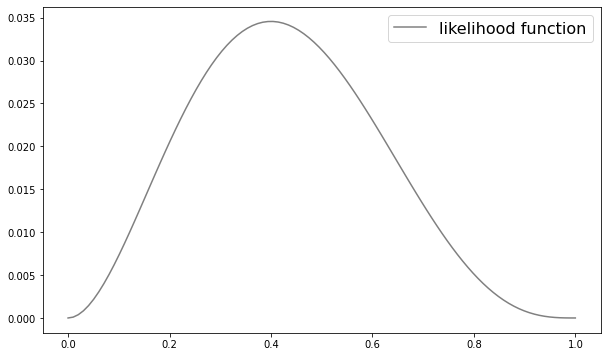

In [ ]:
# 우도함수 시각화, 최우추정법
ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result))
      for prob in ps]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='likelihood function', color='gray')
ax.legend(fontsize=16)
plt.show()

In [ ]:
# 로그우도
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))
mll

-3.365

In [ ]:
# 최대로그우도
rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
mll

-76.325

In [ ]:
# AIC (Akaike' information Criterion)
aic = -2 * mll + 2 * (p+1)
aic

156.650

In [ ]:
# BIC (Bayesian information Criterion)
bic = -2 * mll + np.log(n) * (p+1) 
bic

158.642

## 모형의 타당성
- '회귀분석에서 가정인 오처항은 서로 독립이고 정규분포를 따른다' 라는 가정을 만족하고 있는지 여부를 확인하는 것

In [ ]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Fri, 20 May 2022   Prob (F-statistic):           6.19e-06
Time:                        04:00:41   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.8

In [ ]:
# 오차항에 대한 확인을 위해, 잔차를 분석하도록 한다.
eps_hat = np.array(result.resid)

### 정규성의 검정
- 잔차가 정규분포를 따르는지 확인해보는 정규성 검정을 수행
- 귀무가설 : 잔차항은 정규분포를 따른다
- 대립가설 : 잔차항은 정규분포를 따르지 않는다
- p값인 prob(Omnibus)와 prob(JB)가 유의수준인 0.05보다 크면 문제없이 귀무가설을 채택하게 된다

In [ ]:
# 왜도(Skewness) : 분포의 좌우대칭을 측정하는 지표
# 좌우대칭인 분포면 0이 되고, 왼쪽으로 치우친 분포면 0보다 크고, 오른쪽으로 치우친 분포는 0보다 작다.
stats.skew(eps_hat) # stats.skew로 계산 가능

0.660

In [ ]:
# 첨도(Kurtosis) : 분포의 뾰족한 정도를 측정하는 지표
# 정규분포면 3이 되고, 정규분포보다 뾰족한 정점을 가진 분표이면 3보다 크고, 정규분포보다 완만한 정점을 가진 분포라면 3보다 작은 값이 된다.
stats.kurtosis(eps_hat, fisher=False) # stats.kurtosis의 인수 fisher를 False로 입력하여 계산 가능

2.437

### 더빈-왓슨비(Durbin - Watson Ratio)
- 다른 오차항이 서로 무상관인지 여부를 체크하는 지표
- 0~4의 값을 가지며, 0에 가까우면 양의 상관, 4에 가까우면 음의 상관, 2 근처에 존재하면 무상관이라고 판단

In [ ]:
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2)

1.508

### 다중공선성(Multi-Collinearity)
- 설명변수들 간에 독립 성립되지 않고, 강한 상관관계가 나타나는지 여부를 파악하는 지표
- 조건수의 값이 크면 설명변수들 간에 강한 상관성이 생겼다는 것을 의미한다
- statsmodels의 분석결과에서는 조건수(Cond. No.)로 표현이 된다


In [ ]:
df['mid_test'] = df['quiz'] * 2
df.head()

,quiz,final_test,sleep_time,school_method,mid_test
0,4.2,67,7.2,bus,8.4
1,7.2,71,7.9,bicycle,14.4
2,0.0,19,5.3,bus,0.0
3,3.0,35,6.8,walk,6.0
4,1.5,35,7.5,walk,3.0


In [ ]:
formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 20 May 2022   Prob (F-statistic):           8.59e-06
Time:                        04:11:54   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.0